In [12]:
import cv2
import imutils
import pytesseract
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap
from skimage.color import rgb2gray, gray2rgb, rgb2hsv, rgb2lab, lab2rgb


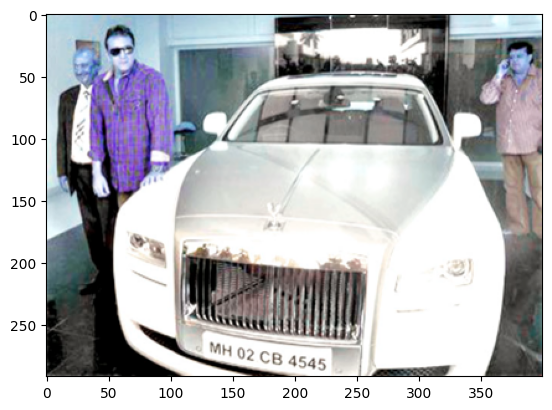

In [13]:
carImage = cv2.imread("../dataset/Cars263.png")
# carImage = cv2.imread("test2.png")
# carImage = imutils.resize(carImage, width=300)
imshow(carImage)

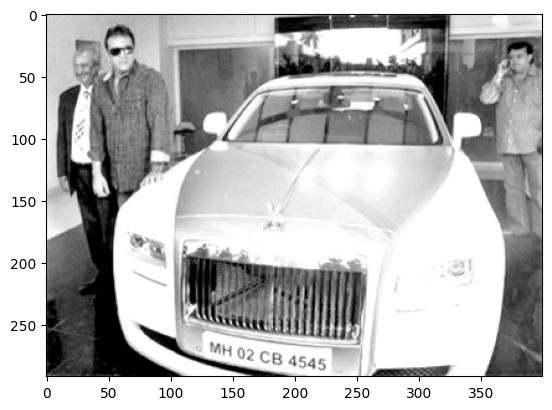

In [14]:
greyCar = cv2.cvtColor(carImage, cv2.COLOR_RGB2GRAY)
imshow(greyCar, "gray")

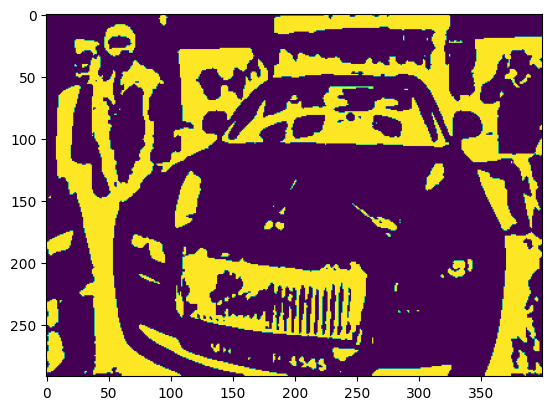

In [15]:
greyCar = cv2.GaussianBlur(greyCar, (5, 5), 0)
thresh = cv2.adaptiveThreshold(greyCar, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)
imshow(thresh)

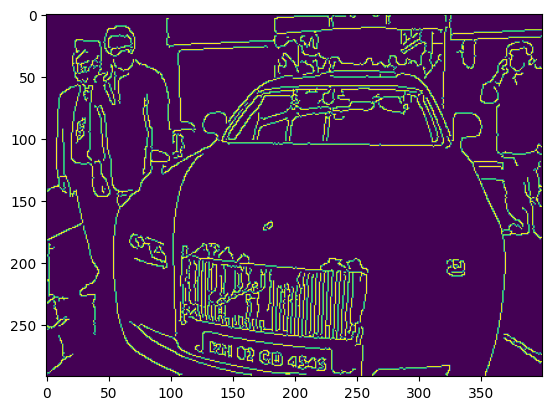

In [16]:
edged = cv2.Canny(greyCar, 30, 200)
imshow(edged)

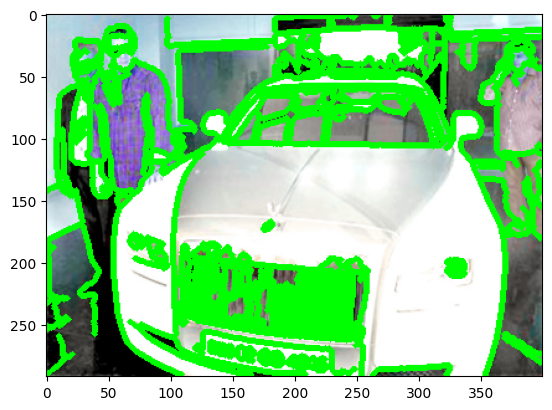

In [17]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
carCopy=carImage.copy()
cv2.drawContours(carCopy,cnts,-1,(0,255,0),3)
imshow(carCopy)

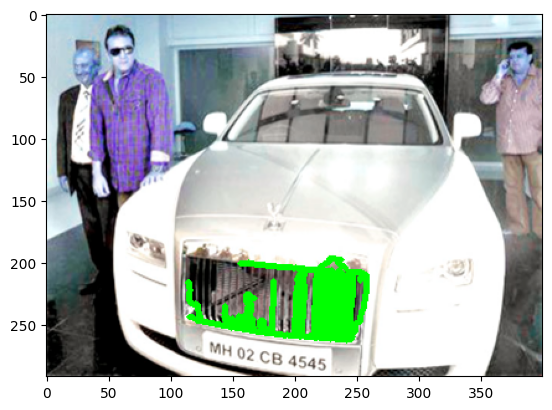

In [18]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:1]
screenCnt = None
image2 = carImage.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
imshow(image2)

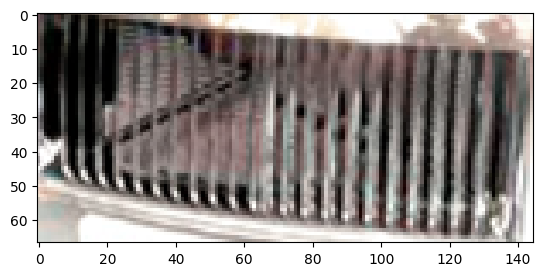

In [19]:
x,y,w,h = cv2.boundingRect(cnts[0]) 
new_img=carImage[y:y+h,x:x+w]
imshow(new_img)